<a href="https://colab.research.google.com/github/afaale/ML/blob/ML/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [265]:
data = sklearn.datasets.load_iris(return_X_y=False, as_frame=False)

data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X = data.data
y = data.target
names = data.target_names
X,y,names


In [72]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [267]:
df = pd.DataFrame(X, columns=data.feature_names)
df['Species'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


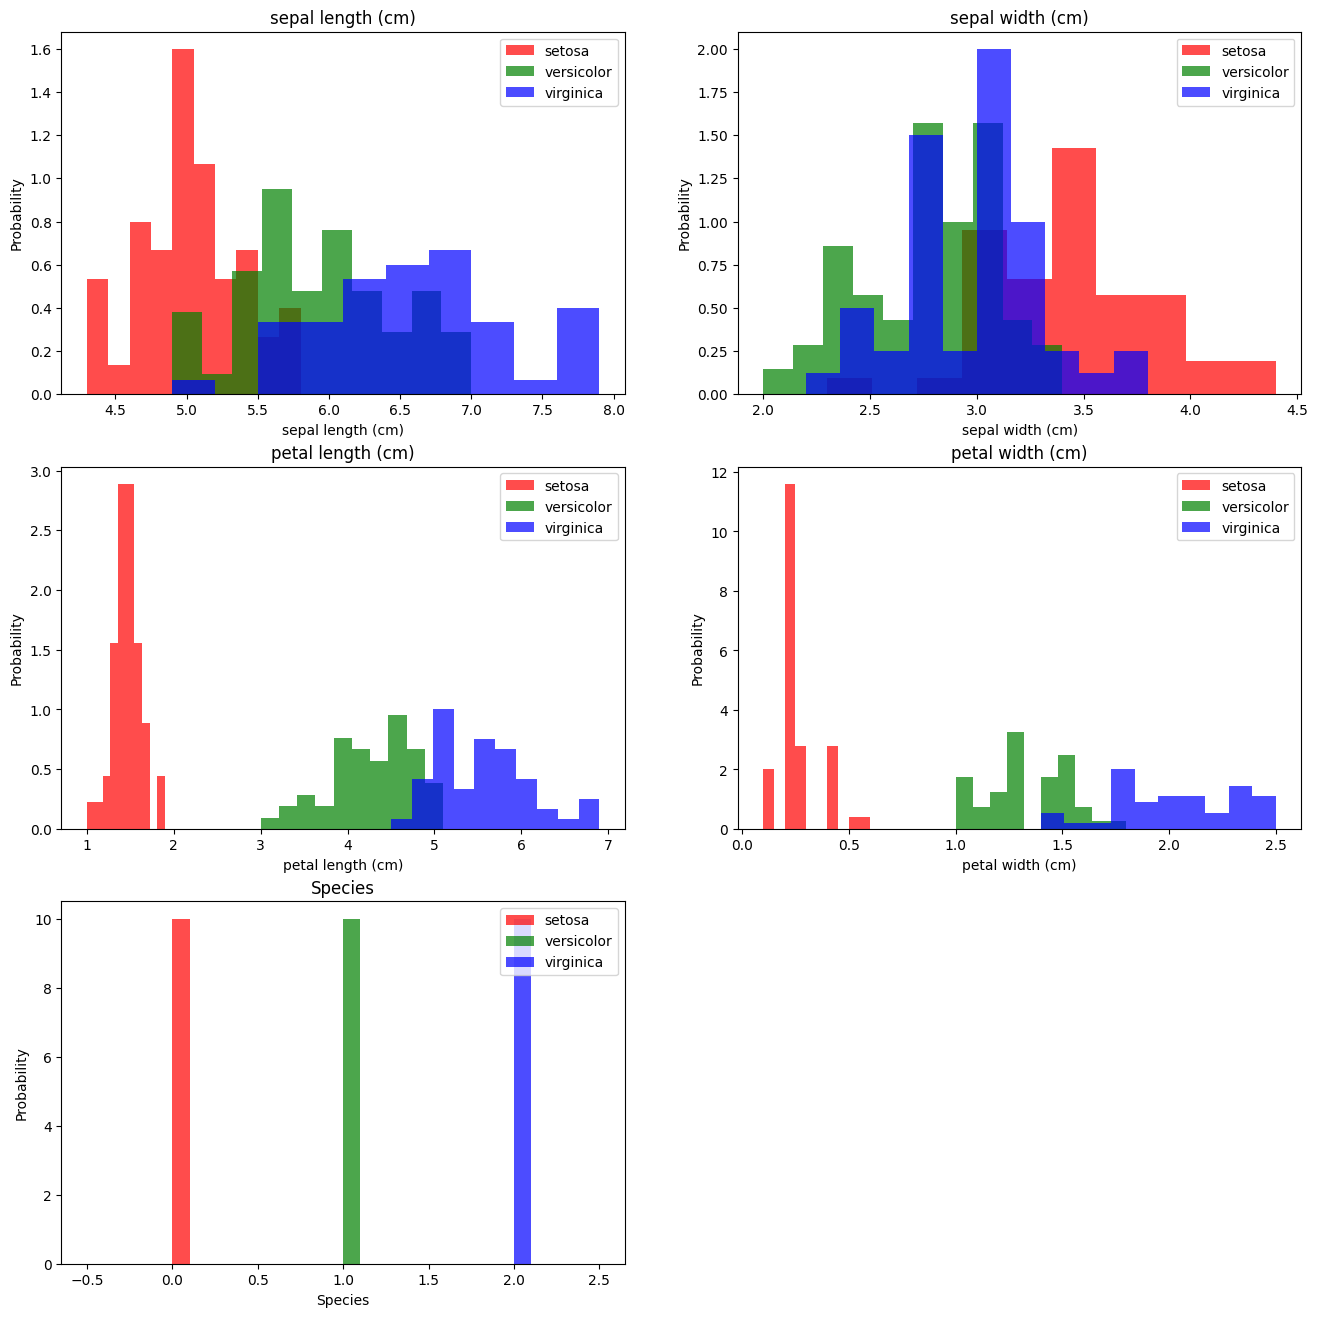

In [269]:
fig = plt.figure(figsize=(16,16))
count = 1
for i in df.columns:
    plt.subplot(3,2,count)
    plt.hist(df[df['Species'] == 0][i], label='setosa', alpha=0.7, color = 'red', density=True)
    plt.hist(df[df['Species'] == 1][i], label='versicolor', alpha=0.7, color = 'green', density=True)
    plt.hist(df[df['Species'] == 2][i], label='virginica', alpha=0.7, color = 'blue', density=True)

    plt.title(i)

    plt.xlabel(i)
    plt.legend()
    plt.ylabel('Probability')
    count += 1
plt.show()


[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
 <Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
 <Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
 <Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>]

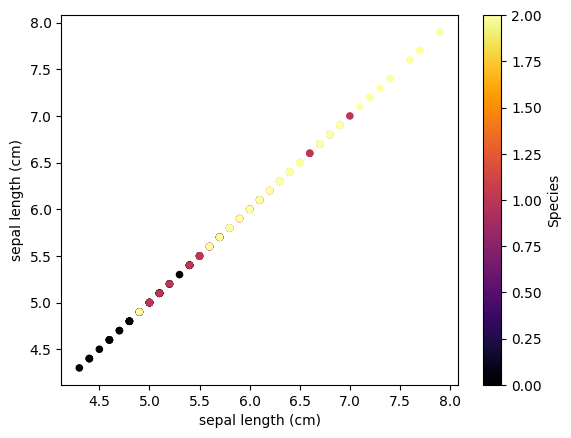

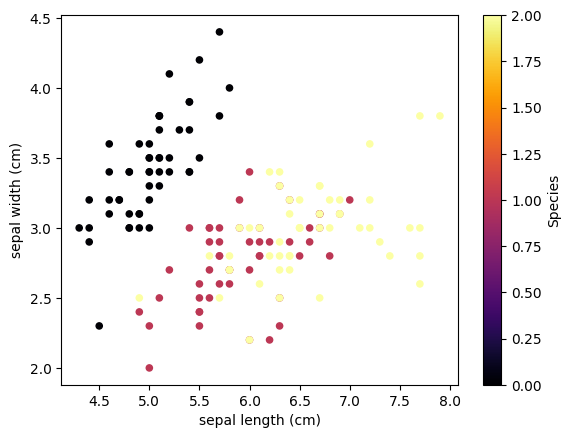

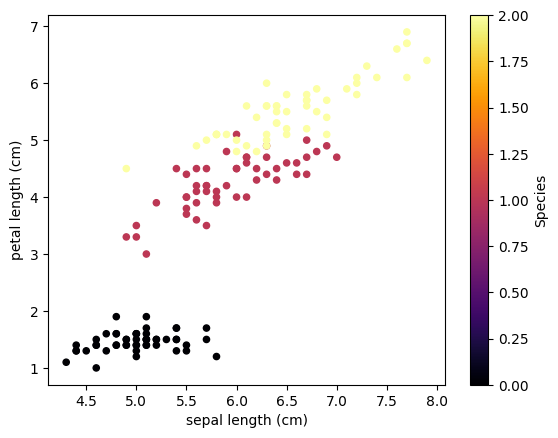

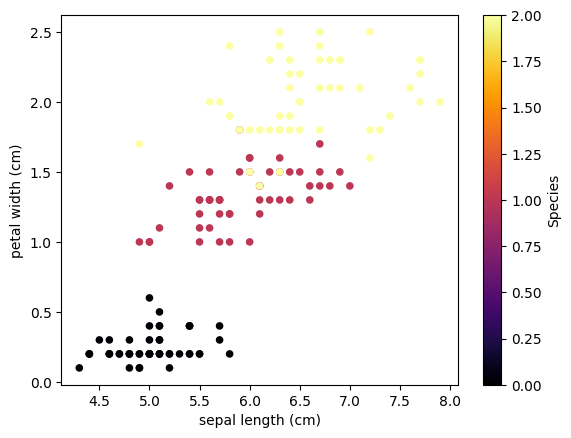

In [186]:
[df.plot.scatter(df.columns[0], df.columns[i], c='Species',colormap='inferno', ) for i in range(4)]

<Axes: >

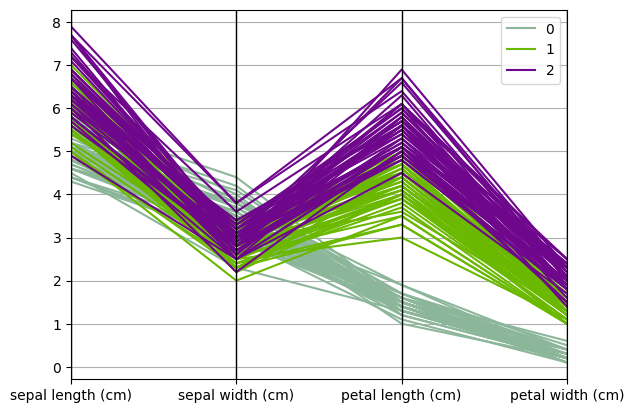

In [292]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, "Species")

In [307]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [314]:
train, test = train_test_split(df, test_size = 0.3)# in this our main data is split into train and test

In [319]:
train['Species']

97     1
149    2
68     1
116    2
27     0
      ..
22     0
7      0
84     1
135    2
94     1
Name: Species, Length: 105, dtype: int64

In [320]:
train_X = train.drop('Species', axis=1)
train_y = train['Species']

In [322]:
test_X = test.drop('Species', axis=1)
test_y = test['Species']

In [324]:
test_y

46     0
72     1
12     0
30     0
145    2
37     0
131    2
63     1
103    2
65     1
115    2
50     1
3      0
128    2
60     1
136    2
81     1
96     1
47     0
6      0
121    2
114    2
18     0
19     0
42     0
123    2
137    2
70     1
32     0
74     1
73     1
23     0
52     1
4      0
24     0
69     1
106    2
111    2
89     1
85     1
142    2
10     0
16     0
2      0
125    2
Name: Species, dtype: int64

# KNN

In [351]:
model = KNeighborsClassifier(n_jobs=-1, n_neighbors=8)
model.fit(train_X,train_y)

KNeighborsClassifier(n_jobs=-1, n_neighbors=8)

In [357]:
y_pred = model.predict(test_X)
(y_pred == test_y)[:20]

46     True
72     True
12     True
30     True
145    True
37     True
131    True
63     True
103    True
65     True
115    True
50     True
3      True
128    True
60     True
136    True
81     True
96     True
47     True
6      True
Name: Species, dtype: bool

In [364]:
best = []

for i in range(7,17):
    model = KNeighborsClassifier(n_jobs=-1, n_neighbors=i)
    model.fit(train_X,train_y)
    y_pred = model.predict(test_X)
    print(f'{i} neighbors: ', '\n', classification_report(test_y, y_pred, digits=4))

7 neighbors:  
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        17
           1     0.9231    0.8571    0.8889        14
           2     0.8667    0.9286    0.8966        14

    accuracy                         0.9333        45
   macro avg     0.9299    0.9286    0.9285        45
weighted avg     0.9346    0.9333    0.9332        45

8 neighbors:  
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        17
           1     0.9333    1.0000    0.9655        14
           2     1.0000    0.9286    0.9630        14

    accuracy                         0.9778        45
   macro avg     0.9778    0.9762    0.9762        45
weighted avg     0.9793    0.9778    0.9777        45

9 neighbors:  
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        17
           1     0.9286    0.9286    0.9286        14
           2     0.9286    

In [365]:
model = KNeighborsClassifier(n_jobs=-1, n_neighbors=i)
model.fit(train_X,train_y)
y_pred = model.predict(test_X)

In [368]:
print(classification_report(test_y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        17
           1     0.9333    1.0000    0.9655        14
           2     1.0000    0.9286    0.9630        14

    accuracy                         0.9778        45
   macro avg     0.9778    0.9762    0.9762        45
weighted avg     0.9793    0.9778    0.9777        45



In [369]:
test[y_pred != test_y]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
106,4.9,2.5,4.5,1.7,2


In [405]:
test_y.shape

(45,)

In [385]:
test_X[y_pred != test_y]
test_X.shape

(45, 4)

In [418]:
test_X.shape, test_y.shape, y_pred.shape

((45, 4), (45,), (45,))

In [419]:
test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
46,5.1,3.8,1.6,0.2,0
72,6.3,2.5,4.9,1.5,1
12,4.8,3.0,1.4,0.1,0
30,4.8,3.1,1.6,0.2,0
145,6.7,3.0,5.2,2.3,2
37,4.9,3.6,1.4,0.1,0
131,7.9,3.8,6.4,2.0,2
63,6.1,2.9,4.7,1.4,1
103,6.3,2.9,5.6,1.8,2
65,6.7,3.1,4.4,1.4,1


In [422]:
pd.DataFrame(y_pred)

,0
0,0
1,1
2,0
3,0
4,2
5,0
6,2
7,1
8,2
9,1


In [439]:
test[y_pred != test_y]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
106,4.9,2.5,4.5,1.7,2


In [446]:
y_pred[-9] == test_y[-9:-8]

106    False
Name: Species, dtype: bool

In [447]:
y_pred[-9]

1